In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

# New Method (Excel)

In [2]:
df = pd.read_excel('hsmdata.xlsx', sheetname=None,header=None)

In [3]:
ExposureTimes = np.array([np.array([df[Sheet][i][0] for i in np.arange(1,df[Sheet].shape[1],6)]) for Sheet in df])
#ExposureTimes is an array, where each element of ExposureTimes is itself an array. 
#Each element of ExposureTimes corresponds to a new sheet/thickness
#Each sub array contains the exposure times taken for that thickness

In [4]:
PixValues = np.arange(0,256)

In [6]:
RedData = np.array([np.array([df[Sheet][2:][i] for i in np.arange(1,df[Sheet].shape[1],6)]) for Sheet in df])
GreenData = np.array([np.array([df[Sheet][2:][i] for i in np.arange(3,df[Sheet].shape[1],6)]) for Sheet in df])
BlueData = np.array([np.array([df[Sheet][2:][i] for i in np.arange(5,df[Sheet].shape[1],6)]) for Sheet in df])

In [120]:
#Array of Each Pixel Value for all thickness at all exposure
r = np.array([np.array([np.array([([PixValues[i]]*RedData[k][j][i]) for i in PixValues if RedData[k][j][i]!=0]) 
              for j in np.arange(0,len(RedData[k]))]) for k in np.arange(0,len(RedData))])

#Going from r to rr is just array flattening
rr = np.array([np.array([np.array([entry for ar in x[j][i] for entry in ar]) 
                         for i in np.arange(0,len(x[j]))]) for j in np.arange(0,len(x))])

g = np.array([np.array([np.array([([PixValues[i]]*GreenData[k][j][i]) for i in PixValues if GreenData[k][j][i]!=0]) 
              for j in np.arange(0,len(GreenData[k]))]) for k in np.arange(0,len(GreenData))])

gg = np.array([np.array([np.array([entry for ar in x[j][i] for entry in ar]) 
                         for i in np.arange(0,len(x[j]))]) for j in np.arange(0,len(x))])

b = np.array([np.array([np.array([([PixValues[i]]*BlueData[k][j][i]) for i in PixValues if BlueData[k][j][i]!=0]) 
              for j in np.arange(0,len(BlueData[k]))]) for k in np.arange(0,len(BlueData))])

bb = np.array([np.array([np.array([entry for ar in x[j][i] for entry in ar]) 
                         for i in np.arange(0,len(x[j]))]) for j in np.arange(0,len(x))])

In [117]:
#STD for all thickness at all espsure
STDRedData = np.array([np.array([np.std(rr[j][i]) for i in np.arange(0,len(rr[j]))]) for j in np.arange(0,len(rr))])
STDGreenData = np.array([np.array([np.std(gg[j][i]) for i in np.arange(0,len(gg[j]))]) for j in np.arange(0,len(gg))])
STDBlueData = np.array([np.array([np.std(bb[j][i]) for i in np.arange(0,len(bb[j]))]) for j in np.arange(0,len(bb))])

In [118]:
#Weighted Sum Calculations
AvgRedData = np.array([np.array([np.sum(np.array([RedData[k][j][i]*PixValues[i] for i in PixValues]))/np.sum(RedData[k][j]) 
          for j in np.arange(0,len(RedData[k]))]) for k in np.arange(0,len(RedData))])

AvgGreenData = np.array([np.array([np.sum(np.array([GreenData[k][j][i]*PixValues[i] for i in PixValues]))/np.sum(GreenData[k][j]) 
          for j in np.arange(0,len(GreenData[k]))]) for k in np.arange(0,len(GreenData))])

AvgBlueData = np.array([np.array([np.sum(np.array([BlueData[k][j][i]*PixValues[i] for i in PixValues]))/np.sum(BlueData[k][j]) 
          for j in np.arange(0,len(BlueData[k]))]) for k in np.arange(0,len(BlueData))])

C:\Anaconda3\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


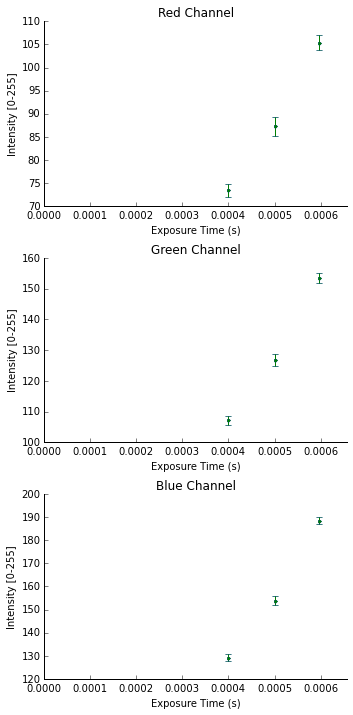

In [119]:
f, (ax1,ax2,ax3) = plt.subplots(3, 1,figsize=(5,10))

ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.yaxis.set_ticks_position('left')
ax1.xaxis.set_ticks_position('bottom')

ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.yaxis.set_ticks_position('left')
ax2.xaxis.set_ticks_position('bottom')

ax3.spines['right'].set_visible(False)
ax3.spines['top'].set_visible(False)
ax3.yaxis.set_ticks_position('left')
ax3.xaxis.set_ticks_position('bottom')

plt.sca(ax1)
for i in np.arange(0,len(AvgRedData)):
    plt.errorbar(ExposureTimes[i],AvgRedData[i], yerr=STDRedData[i],ls='None',marker='.')
    plt.title("Red Channel")
    plt.xlabel("Exposure Time (s)")
    plt.ylabel("Intensity [0-255]")
    plt.xlim(0,np.amax(ExposureTimes[i])*1.1)
    
plt.sca(ax2)
for i in np.arange(0,len(AvgGreenData)):
    plt.errorbar(ExposureTimes[i],AvgGreenData[i], yerr=STDGreenData[i],ls='None',marker='.')
    plt.title("Green Channel")
    plt.xlabel("Exposure Time (s)")
    plt.ylabel("Intensity [0-255]")
    plt.xlim(0,np.amax(ExposureTimes[i])*1.1)

plt.sca(ax3)
for i in np.arange(0,len(AvgBlueData)):
    plt.errorbar(ExposureTimes[i],AvgBlueData[i], yerr=STDBlueData[i],ls='None',marker='.')
    plt.title("Blue Channel")
    plt.xlabel("Exposure Time (s)")
    plt.ylabel("Intensity [0-255]")
    plt.xlim(0,np.amax(ExposureTimes[i])*1.1)

    

plt.tight_layout()

# Old Method (Notepad)

In [6]:
M_Array = np.loadtxt("DataSet1and2.txt",dtype=int) #Main Array

In [7]:
ExposureTimes = np.array([1/100,1/149,1/200,1/250,1/303,1/345]) #Must be entered in the order data was added to text file
N = len(ExposureTimes) #Number of Exposure Times

In [8]:
len(M_Array)/256

90.0

Take Main Array from notepad and split into each "Data Point". Where each data point contains 0-255 information.

In [9]:
C_Array = np.array([M_Array[x:x+256] for x in np.arange(0,len(M_Array),256)]) #Composite Array. Split Main Array every 256 entries

In [10]:
len(C_Array) #Total Number of Histograms

90

Calculating average intensity per pixel from each histogram

In [11]:
Avg_C_Array = np.array([np.sum(np.array([a*b for a,b in C_Array[j]]))/np.sum(np.array([C_Array[j][i][1] for 
                    i in np.arange(len(C_Array[j]))])) for j in np.arange(len(C_Array))])

Now group data points by color. Every third, in RGB order.

In [12]:
Red_Array = np.array([Avg_C_Array[x] for x in np.arange(0,len(Avg_C_Array),3)])
Green_Array = np.array([Avg_C_Array[x] for x in np.arange(1,len(Avg_C_Array),3)])
Blue_Array = np.array([Avg_C_Array[x] for x in np.arange(2,len(Avg_C_Array),3)])

In [13]:
len(Red_Array) #Number of Histograms Per Color Channel

30

Now split Red_Array every N entries. This gives data for each thickness

In [14]:
Red_C_Array = np.array([Red_Array[x:x+N] for x in np.arange(0,len(Red_Array),N)])
Green_C_Array = np.array([Green_Array[x:x+N] for x in np.arange(0,len(Green_Array),N)])
Blue_C_Array = np.array([Blue_Array[x:x+N] for x in np.arange(0,len(Blue_Array),N)])

In [15]:
len(Red_C_Array) #Number of Thicknesses we took data for

5

In [16]:
len(Red_C_Array[0]) #This should be N

6

C:\Anaconda3\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


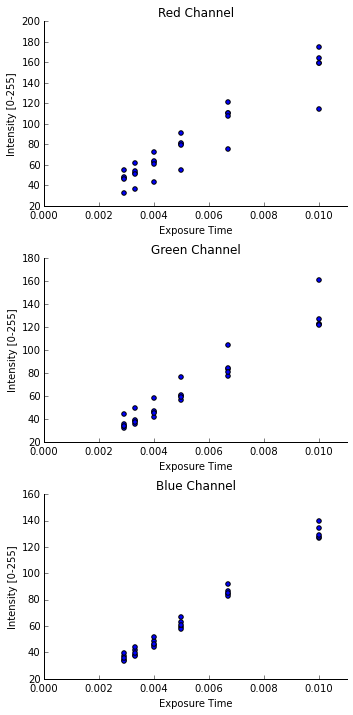

In [17]:
f, (ax1,ax2,ax3) = plt.subplots(3, 1,figsize=(5,10))

ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.yaxis.set_ticks_position('left')
ax1.xaxis.set_ticks_position('bottom')

ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.yaxis.set_ticks_position('left')
ax2.xaxis.set_ticks_position('bottom')

ax3.spines['right'].set_visible(False)
ax3.spines['top'].set_visible(False)
ax3.yaxis.set_ticks_position('left')
ax3.xaxis.set_ticks_position('bottom')

plt.sca(ax1)
for i in np.arange(0,len(Red_C_Array)):
    plt.scatter(ExposureTimes,Red_C_Array[i])
    plt.title("Red Channel")
    plt.xlabel("Exposure Time")
    plt.ylabel("Intensity [0-255]")
    plt.xlim(0,np.amax(ExposureTimes)*1.1)
    
plt.sca(ax2)
for i in np.arange(0,len(Green_C_Array)):
    plt.scatter(ExposureTimes,Green_C_Array[i])
    plt.title("Green Channel")
    plt.xlabel("Exposure Time")
    plt.ylabel("Intensity [0-255]")
    plt.xlim(0,np.amax(ExposureTimes)*1.1)

plt.sca(ax3)
for i in np.arange(0,len(Blue_C_Array)):
    plt.scatter(ExposureTimes,Blue_C_Array[i])
    plt.title("Blue Channel")
    plt.xlabel("Exposure Time")
    plt.ylabel("Intensity [0-255]")
    plt.xlim(0,np.amax(ExposureTimes)*1.1)

    

plt.tight_layout()